In [17]:
import pandas as pd

In [18]:
# create df
election_df = pd.read_csv('elections.csv')

In [19]:
election_df.head(4)

,Unnamed: 0,ons_id,result,first_party,second_party,electorate,valid_votes,invalid_votes,majority,con,...,green,snp,pc,dup,sf,sdlp,uup,alliance,other,other_winner
0,0,W07000049,Lab hold,Lab,Con,50750,31598,82,10490,6518,...,450,0,2711,0,0,0,0,0,731,0
1,1,W07000058,Con hold,Con,Lab,44699,31865,123,2034,14687,...,0,0,2704,0,0,0,0,0,0,0
2,2,S14000001,SNP hold,SNP,Con,62489,37413,72,12670,7535,...,880,20205,0,0,0,0,0,0,0,0
3,3,S14000002,SNP gain from Con,SNP,Con,65719,45638,131,3990,16398,...,0,20388,0,0,0,0,0,0,0,0


In [20]:
election_df['first_party'][0:4]

0    Lab
1    Con
2    SNP
3    SNP
Name: first_party, dtype: object

In [21]:
partiesdf = election_df['first_party'].unique()
partiesdf

array(['Lab', 'Con', 'SNP', 'PC', 'LD', 'DUP', 'SF', 'SDLP', 'Green',
       'Spk', 'Alliance'], dtype=object)

In [22]:
labWinsdf = len(election_df[election_df['first_party'] == 'Lab'])
labWinsdf

202

In [23]:
election_df['first_party'] == 'Lab'

0       True
1      False
2      False
3      False
4      False
       ...  
645     True
646    False
647    False
648     True
649    False
Name: first_party, Length: 650, dtype: bool

In [24]:
election_df[election_df['first_party']=='Lab']

,Unnamed: 0,ons_id,result,first_party,second_party,electorate,valid_votes,invalid_votes,majority,con,...,green,snp,pc,dup,sf,sdlp,uup,alliance,other,other_winner
0,0,W07000049,Lab hold,Lab,Con,50750,31598,82,10490,6518,...,450,0,2711,0,0,0,0,0,731,0
8,8,W07000043,Lab hold,Lab,Con,62789,43008,121,213,18058,...,0,0,1453,0,0,0,0,0,0,0
16,16,E14000537,Lab hold,Lab,Con,67978,38579,125,4263,14281,...,1208,0,0,0,0,0,0,0,0,0
21,21,E14000540,Lab hold,Lab,Con,77953,44499,120,15427,11792,...,820,0,0,0,0,0,0,0,0,0
22,22,E14000541,Lab hold,Lab,Brexit,65277,36903,105,3571,7892,...,900,0,0,0,0,0,0,0,898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,629,E14001044,Lab hold,Lab,Con,55550,42918,107,3003,17692,...,965,0,0,0,0,0,0,0,0,0
635,635,E14001050,Lab hold,Lab,Con,62883,33443,78,1235,14287,...,521,0,0,0,0,0,0,0,0,0
639,639,E14001054,Lab hold,Lab,Con,75219,44707,118,3219,17227,...,1300,0,0,0,0,0,0,0,0,0
645,645,E14001059,Lab hold,Lab,Con,76313,44759,125,10396,13459,...,1559,0,0,0,0,0,0,0,58,0


In [25]:
partyWinsdf = []

for i in partiesdf:
    partyWinsdf.append(len(election_df[election_df['first_party']==i]))
print(partiesdf)
partyWinsdf

['Lab' 'Con' 'SNP' 'PC' 'LD' 'DUP' 'SF' 'SDLP' 'Green' 'Spk' 'Alliance']


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [26]:
partyWinsdf = [len(election_df[election_df['first_party']==i]) for i in partiesdf]
print(partiesdf)
partyWinsdf

['Lab' 'Con' 'SNP' 'PC' 'LD' 'DUP' 'SF' 'SDLP' 'Green' 'Spk' 'Alliance']


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [27]:
partiesdf

array(['Lab', 'Con', 'SNP', 'PC', 'LD', 'DUP', 'SF', 'SDLP', 'Green',
       'Spk', 'Alliance'], dtype=object)

In [28]:
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'

<AxesSubplot:title={'center':'Seat allocation per party'}>

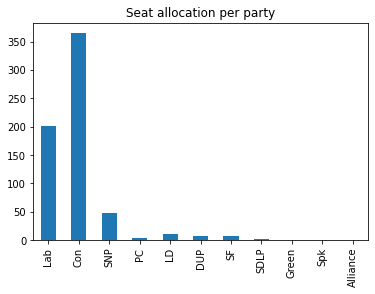

In [29]:
dfdf = pd.DataFrame(partyWinsdf,partiesdf)
dfdf.plot.bar(legend=False,title='Seat allocation per party')


In [30]:
election_df.columns

Index(['Unnamed: 0', 'ons_id', 'result', 'first_party', 'second_party',
       'electorate', 'valid_votes', 'invalid_votes', 'majority', 'con', 'lab',
       'ld', 'brexit', 'green', 'snp', 'pc', 'dup', 'sf', 'sdlp', 'uup',
       'alliance', 'other', 'other_winner'],
      dtype='object')

In [31]:
parties = list(partiesdf)
parties.remove('Spk')
seats = list(partyWinsdf)[:-1]
print(seats)

total_votes=election_df['valid_votes'].sum()

print(total_votes)
total_votes_party = [election_df[i.lower()].sum(axis=0) for i in parties]
total_votes_party

[202, 365, 48, 4, 11, 8, 7, 2, 1, 1]
32014110


[10269051,
 13966454,
 1242380,
 153265,
 3696419,
 244128,
 181853,
 118737,
 865715,
 134115]

,parties,percentage_votes,percentage_seats,deficit
0,Lab,32.076641,31.076923,-0.999718
1,Con,43.625932,56.153846,12.527914
2,SNP,3.880726,7.384615,3.503889
3,PC,0.478742,0.615385,0.136643
4,LD,11.546218,1.692308,-9.853911
5,DUP,0.762564,1.230769,0.468205
6,SF,0.568040,1.076923,0.508883
7,SDLP,0.370890,0.307692,-0.063197
8,Green,2.704167,0.153846,-2.550321
9,Alliance,0.418925,0.153846,-0.265079


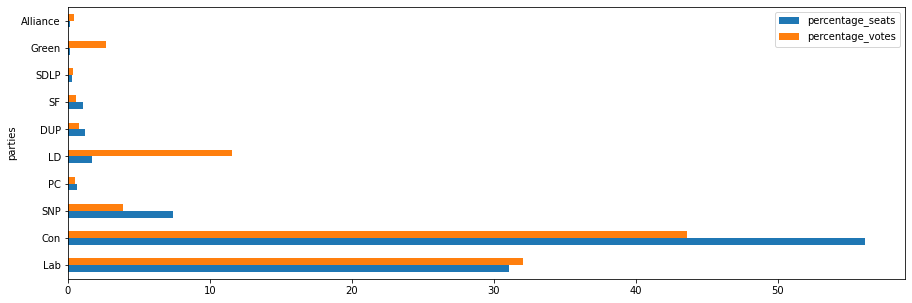

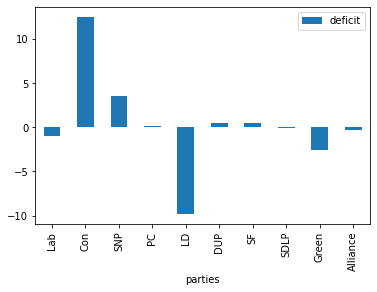

In [32]:
sharedf = pd.DataFrame()
sharedf['parties'] = parties
share = [ total_votes_party[i]/total_votes*100 for i in range(0,len(total_votes_party))]

sharedf['percentage_votes'] = total_votes_party
sharedf['percentage_votes']=sharedf['percentage_votes']/total_votes*100
sharedf['percentage_seats'] = seats
sharedf['percentage_seats']=sharedf['percentage_seats']/650*100
sharedf['deficit']=sharedf['percentage_seats']-sharedf['percentage_votes']

sharedf.plot.barh(x='parties',y=['percentage_seats','percentage_votes'],figsize=(15,5))
sharedf.plot.bar(x='parties',y='deficit')

sharedf

In [33]:
for i in range (0,len(election_df)):
    party=(election_df.iloc[i,3].lower())
    print(election_df[party].iloc[i])



17008
14687
20205
20388
17929
27980
27850
26311
18271
29096
21216
13134
21040
35566
19231
37270
18544
32737
20272
34148
21182
27219
14804
14329
23876
29590
29593
28078
28419
22594
27290
32477
27282
20491
20874
23078
27079
20866
31723
25747
23947
44052
33250
37590
25856
24990
21217
17720
35889
35397
33355
19957
26594
27714
23379
24067
29040
23887
22364
16247
14862
19794
17440
32521
21791
19759
21516
27255
39066
31963
36056
24926
24550
31894
27825
18390
33736
34112
21958
31779
29266
26911
36308
18193
35827
30941
25033
33151
27717
27330
27895
47028
33934
23958
34408
30631
26602
37035
15720
29560
21660
22034
37770
18018
11705
29981
40258
26764
25776
31636
29018
25605
26064
27382
23908
23659
15939
22183
20822
33971
21486
32095
35253
15208
35121
28856
25694
31934
23345
28486
30850
18171
35402
23481
30994
25745


KeyError: 'spk'